# Week 12 - Cloud Computing

## Roadmap

- Slow Code?
    - Code profiling and benchmarking
    - Code optimization
- Parallel computing
    - Overview
- Pandas optimization for speed and memory constraints
- Cloud Computing
    - Running Jupyter on Amazon Web Services

## Slow Code?

![](images/python_speed_timing_banner.png)

## What are my options

- Do you need to **optimize your code**?  

- Is it worth **upgrading** your machine?   

- Are **cloud services** an option? 

![](images/computer_slow.jpg)

## Benchmarking your Code

![](images/sprint_bolt.jpg)


## Estimating Running Time With `timeit`

We can run time the execution speed of our Python code with the `timeit` module. In the command line this would be

```
$ python3 -m timeit '"-".join(str(n) for n in range(100))'
10000 loops, best of 5: 30.2 usec per loop
$ python3 -m timeit '"-".join(map(str, range(100)))'
10000 loops, best of 5: 23.2 usec per loop
```


## Estimating Running Time With `timeit`

We can also use the `timeit` module within our Python code:

In [6]:
import timeit
timeit.timeit('"-".join(str(n) for n in range(100))', number=10000)

0.20136570500000062

In [7]:
timeit.timeit('"-".join(map(str, range(100)))', number=10000)

0.15119546400001127

## Estimating Running Time With `timeit`

Finally, the IPython interactive shell and the Jupyter notebook have extra support for this functionality with the `%timeit` magic command. Notice, in the second cell we add a few options on the number of repeats (`-r`) and loops (`-n`) to run.

In [15]:
%%timeit
"-".join(str(n) for n in range(100))

17.7 µs ± 329 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%%timeit -r 4 -n 10_000
"-".join(map(str, range(100)))

12.9 µs ± 810 ns per loop (mean ± std. dev. of 4 runs, 10000 loops each)


## Profiling your code

`timeit` is great for benchmarking a small snippet of code. However, it is impractical to check all parts of your program and locate which sections take the most time. Instead, you can use a profiler.

- `cProfile` and `profile` are included in the Python 3 base package
- `snakeviz` is great to visualize the `cProfile` output

## `cProfile`
Both `cProfile` and `profile` are modules available in the Python3 language. The numbers produced by these modules can be formatted into reports via the `pstats` module.

In [17]:
import cProfile
import re

cProfile.run('re.compile("foo|bar")')

         214 function calls (207 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 enum.py:358(__call__)
        2    0.000    0.000    0.000    0.000 enum.py:670(__new__)
        1    0.000    0.000    0.000    0.000 enum.py:977(__and__)
        1    0.000    0.000    0.000    0.000 re.py:250(compile)
        1    0.000    0.000    0.000    0.000 re.py:289(_compile)
        1    0.000    0.000    0.000    0.000 sre_compile.py:265(_compile_charset)
        1    0.000    0.000    0.000    0.000 sre_compile.py:292(_optimize_charset)
        2    0.000    0.000    0.000    0.000 sre_compile.py:477(_get_iscased)
        1    0.000    0.000    0.000    0.000 sre_compile.py:485(_get_literal_prefix)
        1    0.000    0.000    0.000    0.000 sre_compile.py:516(_get_charset_prefix)
        1   

## `snakeviz` 

[snakeviz](https://jiffyclub.github.io/snakeviz/) is a good tool to visualize the output of `cProfile`.

Execute the `addition.py` script this time with the timing information being directed to an external output file, rather than standard console output. Observe the `-oflag` with the output filename being `addition.prof`

In [29]:
!python -m cProfile -o addition.prof addition.py

50.69211
50.49504
50.52903


Next, run in the command line. After execution of the above command `snakeviz` will launch a visualization browser.

## `snakeviz`

![](images/snakeviz.gif)

## `snakeviz`

We can also use `snakeviz` within a jupyter notebook. First, we need to load the extension:

In [1]:
%load_ext snakeviz

In [2]:
from addition import main_func 

50.50195
50.41884
50.52995


## `snakeviz`

In [3]:
%snakeviz main_func()

50.4997
50.55322
50.43585
 
*** Profile stats marshalled to file '/var/folders/bp/73dw_y952fb5cj7h4bjs06t40000gp/T/tmpf3fpl5ex'.
Embedding SnakeViz in this document...


## Optimize your code

![](images/knuth_premature_optimization.png)


## Optimize your code

This quote is not to discourage optimization but a reminder to **focus on where optimization is needed**:

- _code optimization_: make your code modular, well tested, easy to read
- _speed optimization_: identify the code pieces that are slow and would benefit the overall application the most if improved
- _memory optimization_: Are they memory usage bottlenecks that require more resources than needed and/or slow things down needlessly?


## Memory optimization

![](images/memory_management_python_banner.png)

## Memory management in Python

- Python is an _interpreted language_ with most of its _routines written in C_
- All _objects are referenced_ and have one specific place in the physical memory.
- To avoid memory collisions in shared memory space, Python uses a _Global Interpreter Lock_ (GIL)
- Memory that is no longer needed is freed up with a _garbage collection process_, moving pointers to memory addresses between _pools of untouched, free, and allocated memory spaces_.


To learn more, this [Real Python tutorial on Python Memory Management](https://realpython.com/python-memory-management/) is a good start.

## Improve Memory Usage and Make Your Python Code Faster Using Generators

Remember generators? Well, these are a good example of considering memory consumption.

Recall, a generator looks a lot like a function, but uses the keyword `yield` instead of `return`. Here is an example:

In [4]:
def generate_numbers():
    n = 0
    while n < 3:
        yield n
        n += 1

which returns a generator object when called:

In [5]:
numbers = generate_numbers()
type(numbers)

generator

## Generator `next()`

We can call the generator object with the built-in `next()` function

In [6]:
next_number = generate_numbers()
next(next_number)

0

In [7]:
next(next_number)

1

## `yield` vs `return`

Recall, when the Python `yield` statement is called, the program suspends function execution and returns the yielded value to the caller. When a function is suspended, the state of that function is saved.

In contrast, a normal function with a `return` statement would complete the entire function at once.

## I: Function approach

In [8]:
import memory_profiler
import time
def check_even(numbers):
    even = []
    for num in numbers:
        if num % 2 == 0: 
            even.append(num*num)
    return even

In [9]:
m1 = memory_profiler.memory_usage()
t1 = time.time()
cubes = check_even(range(100000000))
t2 = time.time()
m2 = memory_profiler.memory_usage()
time_diff_function = t2 - t1
mem_diff_function = m2[0] - m1[0]
print(f"It took {time_diff_function} Secs and {mem_diff_function} Mb to execute this method")

It took 7.739811182022095 Secs and 1674.35546875 Mb to execute this method


## II: Generator approach

In [10]:
def check_even(numbers):
    for num in numbers:
        if num % 2 == 0:
            yield num * num 

In [16]:
m1 = memory_profiler.memory_usage()
t1 = time.time()
cubes = check_even(range(100000000))
t2 = time.time()
m2 = memory_profiler.memory_usage()
time_diff_generator = t2 - t1
mem_diff_generator = m2[0] - m1[0]
print(f"It took {time_diff_generator} Secs and {mem_diff_generator} Mb to execute this method")

It took 0.00015211105346679688 Secs and 0.0 Mb to execute this method


## Generators are more compute and memory efficient

|                           | Function | Generator | Percentage Reduction Generator vs. Function |
|---------------------------|----------|-----------|-----------|
| Time taken to execute (s) | {{ round(time_diff_function, 2) }} | {{ round(time_diff_generator, 5) }} | {{ round( (time_diff_function - time_diff_generator) / time_diff_function * 100, 5) }} Percent |
| Memory usage (Mb)         | {{ round(mem_diff_function, 2) }} | {{ round(mem_diff_generator, 5) }} | {{ round( (mem_diff_function - mem_diff_generator) / mem_diff_function * 100, 5) }} Percent |


Python generators can be used to reduce memory usage and make the code execute faster. The advantage lies in the fact that **generators do not store all results in memory**, rather they generate them on the fly, hence the memory is only used when we ask for the result.

## System info

In the example above, you already saw the usage of `memory_profiler` to record the memory usage of a function. 

Before going further, it is always helpful to get some info on your system (whether it is you laptop or a remote machine).

Let's use some convenience functions to print out some main info:

In [23]:
import print_system_info

======================================== Python Version ========================================
3.10.8 (main, Oct 13 2022, 10:17:43) [Clang 14.0.0 (clang-1400.0.29.102)]
sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
======================================== System Information ========================================
System: Darwin
Release: 21.6.0
Version: Darwin Kernel Version 21.6.0: Mon Aug 22 20:17:10 PDT 2022; root:xnu-8020.140.49~2/RELEASE_X86_64
Machine: x86_64
Processor: i386
======================================== CPU Info ========================================
Physical cores: 8
Total cores: 16
Max Frequency: 2400.00Mhz
Min Frequency: 2400.00Mhz
Current Frequency: 2400.00Mhz
CPU Usage Per Core:
Core 0: 29.0%
Core 1: 3.0%
Core 2: 29.7%
Core 3: 3.0%
Core 4: 23.8%
Core 5: 3.0%
Core 6: 15.0%
Core 7: 2.0%
Core 8: 14.9%
Core 9: 3.9%
Core 10: 9.9%
Core 11: 2.0%
Core 12: 8.9%
Core 13: 2.0%
Core 14: 7.0%
Core 15: 3.0%
Total CPU Usage: 7.3%
=============

## Pandas optimization

![](images/pandas_speed_up_banner.png)

## Is `pandas` fast or slow?


The `pandas` documentation says that it uses:

> **fast**, **flexible**, and expressive data structures designed to make working with “relational” or “labeled” data both **easy** and **intuitive**.

`pandas` data frames are built on top of `numpy` arrays and all significant operations are written in C. Moreover, most built-in operations are vectorized which is useful.

But, there are several things that are good to know to make `pandas` as speedy as it can be.

![](images/pandas_slide.gif)

## Reduce `DataFrame` size - Change in `int` datatype

- **Situation**: Let say, you have an `Age` column with a minimum value of `1` and maximum value of `150`, with 10 million total rows in dataframe
- **Task**: Reduce Memory Usage of the `Age` column given above constraints
- **Action**: Change of original `dtype` from `int32` to `uint8`

## Reduce `DataFrame` size - Change in `int` datatype


In [27]:
import pandas as pd
## Initializing minimum and maximum value of age
min_age_value , max_age_value = 1, 150
## Number of rows in dataframe
nrows = int(np.power(10,7))
## creation of Age dataframe
df_age = pd.DataFrame({'Age':np.random.randint(low=1,high=100,size=nrows)})
## check memory usage before action
df_age.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   Age     int64
dtypes: int64(1)
memory usage: 76.3 MB


## Reduce `DataFrame` size - Change in `int` datatype


In [25]:
## Range of "uint8"; satisfies range constraint of Age column 
np.iinfo('uint8') 

iinfo(min=0, max=255, dtype=uint8)

In [26]:
## Action: conversion of dtype from "int32" to "uint8"
converted_df_age = df_age.astype(np.uint8)
## check memory usage after action
converted_df_age.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   Age     uint8
dtypes: uint8(1)
memory usage: 9.5 MB


Drop from  76.3 MB to 9.5 MB in memory usage i.e. 88% reduction.

## Reduce `DataFrame` size

In general, reducing the data type to the appropriate (most restricted) `dtype` is a great way to save memory - in pandas as well as in databases. 

The most significant effects are usually found in string or object columns.

Let's consider another example.

## Reduce `DataFrame` size - Change from object to category datatype

- **Situation**: Let say, you have `Day of Week` column having 7 unique values, with 4.9 million total rows in dataframe
- **Task**: Reduce memory usage of `Day of Week` column given only 7 unique values exist
- **Action**: Change of `dtype` from object to category as ratio of unique values to no. of rows is almost zero

## Reduce `DataFrame` size - Change from object to category datatype

In [59]:
## unique values of "days of week"
day_of_week = ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
## Number of times day_of_week repeats
repeat_times = 7*np.power(10,6)
## creation of days of week dataframe
df_day_of_week = pd.DataFrame({'day_of_week':np.repeat(a=day_of_week,repeats = repeat_times)})
print("No of rows in days of week dataframe {}".format(df_day_of_week.shape[0])) 

No of rows in days of week dataframe 49000000


In [60]:
## check memory usage before action
df_day_of_week.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000000 entries, 0 to 48999999
Data columns (total 1 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   day_of_week  object
dtypes: object(1)
memory usage: 2.9 GB


## Reduce `DataFrame` size - Change from object to category datatype

In [61]:
## Action: conversion of dtype from "object" to "category"
converted_df_day_of_week = df_day_of_week.astype('category')
## check memory usage after action
converted_df_day_of_week.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000000 entries, 0 to 48999999
Data columns (total 1 columns):
 #   Column       Dtype   
---  ------       -----   
 0   day_of_week  category
dtypes: category(1)
memory usage: 46.7 MB


Wow. We reduced the size of our dataframe from 2.9 GB to 46.7 MB or 0.045 GB in memory usage. That is a 98% reduction for a pretty simple adjustment.


In [62]:
## check first two rows of dataframe
converted_df_day_of_week.head(2)

,day_of_week
0,monday
1,monday


## Reduce `DataFrame` size - Convert to Sparse DataFrame

If you have dataframe with a large count of zero or missing values, then `sparse matrices` may be a memory and compute efficient options. This often happens when `one-hot encoding` across lots of categories (e.g. users and movie reviews where most users do not review most movies). 

Pandas offers built-in sparse matrices (learn more in [this tutorial](https://matteding.github.io/2019/04/25/sparse-matrices/) and the benefits in `sklearn` [here](https://towardsdatascience.com/working-with-sparse-data-sets-in-pandas-and-sklearn-d26c1cfbe067)). 

![](images/matrices_sparse_vs_dense.png)

![](images/matrices_sparse_vs_dense_coo.gif)

## Reduce DataFrame Loading Time - Do not load all columns

- **Situation**: Let say, you have csv file which has 100 columns and you only need 10 columns for processing
- **Task**: Reduce `pd.read_csv()` loading time
- **Action**: Only load the required columns explicitly i.e. only 10 columns not 100 columns which is the default

## Reduce DataFrame Loading Time - Do not load all columns


In [85]:
t0 = time.time()
df_2005 = pd.read_csv('data/2005_data.csv', low_memory=False)
  # data comes from here: https://www.kaggle.com/cdc/mortality?select=2015_data.csv 
  # and is also stored here: https://www.dropbox.com/s/jjmpkao2c65wb84/2005_data.csv?dl=1
t1 = time.time()
print(f"Default Loading time {round(t1-t0,2)} seconds")

Default Loading time 17.82 seconds


In [87]:
t0 = time.time()
df_2005_sel = pd.read_csv('data/2005_data.csv', 
                  usecols=['resident_status','month_of_death'],
                  low_memory=False)
t1 = time.time()
print(f"Default Loading time {round(t1-t0,2)} seconds")

Default Loading time 4.23 seconds


Selecting a subset of column significantly increases loading speed.

## Use of other libraries instead of `pandas` but with similar functionality

`Dask` — Dask provides multi-core execution on larger-than-memory datasets.

`Modin` — Modin transparently distributes the data and computation. Modin provides speed-ups of up to 4x on a laptop with 4 physical cores. While `pandas` is only able to use one core at a time when you are doing computation of any kind, with `modin`, you are able to use all of the CPU cores on your machine.

![](images/modin_read_csv_speed_comparison.png)

## `pandas` vs `modin`

|Operation                                     |Pandas Time|Modin Time|Speedup|
|----------------------------------------------|-----------|----------|-------|
|pd.read_csv('esea_master_dmg_demos.part1.csv')|8.38       |3.22      |2.6    |
|pd.concat([df for _ in range(5)])             |3.56       |0.041     |86.83  |
|df.groupby(by='wp_type')                      |0.00029    |0.059     |0.0049 |
|df.fillna(value=0)                            |1.8        |0.21      |8.57   |
|df.dropna()                                   |1.24       |1.71      |0.73   |
|df.count()                                    |1.09       |0.046     |23.70  |
|df.drop_duplicates()                          |7.68       |13.38     |0.57   |
|df.describe()                                 |1.30       |4.69      |0.28   |
|df['seconds'].max()                           |0.015      |0.26      |0.058  |

## Vectorize and use `numpy` arrays

Sofia Heisler showed in her PyCon 2017 talk on [Optimizing pandas](https://github.com/s-heisler/pycon2017-optimizing-pandas) that using `numpy` and vectorized arguments is highly beneficial.

![](images/pandas_vs_numpy_speed.png)


## Vectorization

**Vectorization** is the process of executing operations on entire arrays. 

As mentioned, `pandas` has built in optimizations for vectorized operations. Let's compare some best iterative options for `panda` are by comparing `.iloc[]`, `.iterrows()`, `.loc[]` and `.map()/.apply()`.

In the our example we want to normalize the price column between 0 and 1, using the different operations stated above.

We are going to use the [Berlin AirBnB listings dataset](https://www.kaggle.com/brittabettendorf/berlin-airbnb-data?select=listings.csv).

In [94]:
listings = pd.read_csv("data/airbnb_berlin_listings.csv")
min_price = min(listings.price)
max_price = max(listings.price)

## Vectorization

In [99]:
%%timeit -r 3
# .iloc[]
norm_prices = np.zeros(len(listings,))
for i in range(len(listings)):
    norm_prices[i] = (listings.iloc[i]['price'] - min_price) / (max_price - min_price)
listings['norm_price'] = norm_prices

2.06 s ± 34.4 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [100]:
%%timeit -r 3
# Iterrows()
norm_prices = np.zeros(len(listings,))
for i, row in listings.iterrows():
    norm_prices[i] = (row['price'] - min_price) / (max_price - min_price)
listings['norm_price'] = norm_prices

769 ms ± 26.9 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [101]:
%%timeit -r 3
# .loc[]
norm_prices = np.zeros(len(listings,))
for i in range(len(norm_prices)):
    norm_prices[i] = (listings.loc[i, 'price'] - min_price) / (max_price - min_price)
listings['norm_price'] = norm_prices

155 ms ± 2.99 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [102]:
%%timeit -r 3
# .map()
listings['norm_price'] = listings['price'].map(lambda x: (x - min_price) / (max_price - min_price))

5.24 ms ± 758 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [103]:
%%timeit -r 3
# Vectorize
listings['norm_price'] = (listings['price'] - min_price) / (max_price - min_price)

271 µs ± 8.99 µs per loop (mean ± std. dev. of 3 runs, 1,000 loops each)


## Vectorization

The **vectorized approach is ~7600 times faster** than using `.iloc[]` in this example. Nothing to sneeze at. 

`Numpy` looping can be a good idea if the loop is small but vectorization pays big dividends as the number of repetitions becomes larger:

![](images/numpy_vs_vectorized.png)


# Parallel computing

![](images/horse_power.jpg)

## Parallelization of `pandas` with `pandarallel`

In [118]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import time
from pandarallel import pandarallel
import math
import numpy as np
pandarallel.initialize(progress_bar=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## `pandarallel` - `DataFrame.apply`


In [119]:
df_size = int(500000)
df = pd.DataFrame(dict(a=np.random.randint(1, 8, df_size),
                       b=np.random.rand(df_size)))
def func(x):
    return math.sin(x.a**2) + math.sin(x.b**2)

In [122]:
%%timeit -r 1
res = df.apply(func, axis=1)

8.08 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [123]:
%%timeit -r 1
res_parallel = df.parallel_apply(func, axis=1)

1.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


A speed improvement of ~5x which will only grow as the number of repetitions increases. Let's just make sure the result is the same:

In [124]:
res.equals(res_parallel)

True

## `pandarallel` - `DataFrame.apply`

![](images/progress_parallel_apply.gif)

## `pandarallel` - general performance

![](images/pandarallel_standard_vs_parallel_4_cores.png)



## `pandarallel` - easy to implement

With `df` a pandas DataFrame, `series` a pandas Series, `func` a function to
apply/map, `args`, `args1`, `args2` some arguments, and `col_name` a column name:

| Without parallelization                                 | With parallelization                                             |
|:------------------------------------------------------- |:---------------------------------------------------------------- |
| `df.apply(func)`                                        | `df.parallel_apply(func)`                                        |
| `df.applymap(func)`                                     | `df.parallel_applymap(func)`                                     |
| `df.groupby(args).apply(func)`                          | `df.groupby(args).parallel_apply(func)`                          |
| `df.groupby(args1).col_name.rolling(args2).apply(func)` | `df.groupby(args1).col_name.rolling(args2).parallel_apply(func)` |
| `df.groupby(args1).col_name.expanding(args2).apply(func)` | `df.groupby(args1).col_name.expanding(args2).parallel_apply(func)` |
| `series.map(func)`                                      | `series.parallel_map(func)`                                      |
| `series.apply(func)`                                    | `series.parallel_apply(func)`                                    |
| `series.rolling(args).apply(func)`                      | `series.rolling(args).parallel_apply(func)`                      |


# Cloud Computing

![](images/cloud_computing_icon.jpg)


## What is Cloud Computing?

> Cloud computing is a model for enabling ubiquitous, convenient, on-demand network access to a shared pool of configurable computing resources (e.g., networks, servers, storage, applications, and services) that can be rapidly provisioned and released with minimal management effort or service provider interaction. 

Source: [National Institute of Standards and Technology (NIST)](https://csrc.nist.gov/publications/detail/sp/800-145/final)

## Motivation 

- **Access your Python code/data** from anywhere and do your **analysis from any device**, be it a PC, tablet or even smartphone.

- **Instantaneously augment your CPU and memory** with a click. Cheaper than buying a faster machine.  

- Instantaneously **switch between operating systems and system configurations**. 

- Ability to **load multiple Python sessions** at once, or **parallelize your code**.


## Cloud Services Market

![](images/cloud_market_share_Q32022.jpeg)


## Some Amazon Web Services (AWS) Specific Terminology

**AWS: “Amazon Web Services”**. Includes all of Amazon’s cloud services. Most are actually not be needed for mere data analysis.

**EC2: “Elastic Cloud”.** The framework for running your cloud machines. This is the main service for our purposes.

**EBS: “Elastic Block Storage”.** A storage framework. If you want to attach storage to your EC2 cloud machines.

**S3: “Simple Storage Service”.** A central storage framework. If you want all your machines to read and write to a single cloud storage.

**AMI: “Amazon Machine Image”:** A snapshot of your machines’ configurations for backup and reuse on other machines.

## Create an account

Go to https://aws.amazon.com/education/awseducate/ to receive an educational account.

![](images/rcloud_1.png)

## Login to AWS console

https://aws.amazon.com/

![](images/aws_console.png)

## Go to EC2 service

On the product page, find the section labeled “Compute” and click on “EC2”:

![](images/aws_ec2_selection.png)

## Launch EC2 instance

Go to `EC2` service and click [**Launch Instance**](https://console.aws.amazon.com/ec2/v2/home?region=us-east-1#LaunchInstanceWizard:)

![](images/aws_launch_ec2_instance.png)

## Picking an operating system

EC2 has a large **variety of operating system available** and you are free to pick whichever works best for your needs. The main differences between the operating systems are whether they are based on Windows or Linux. Windows based OS are designed to run several Windows specific programs, while Linux OS’s are designed to be minimal and fast. 

More information on the [specific operating systems provided by AWS here](https://aws.amazon.com/marketplace/b/2649367011).

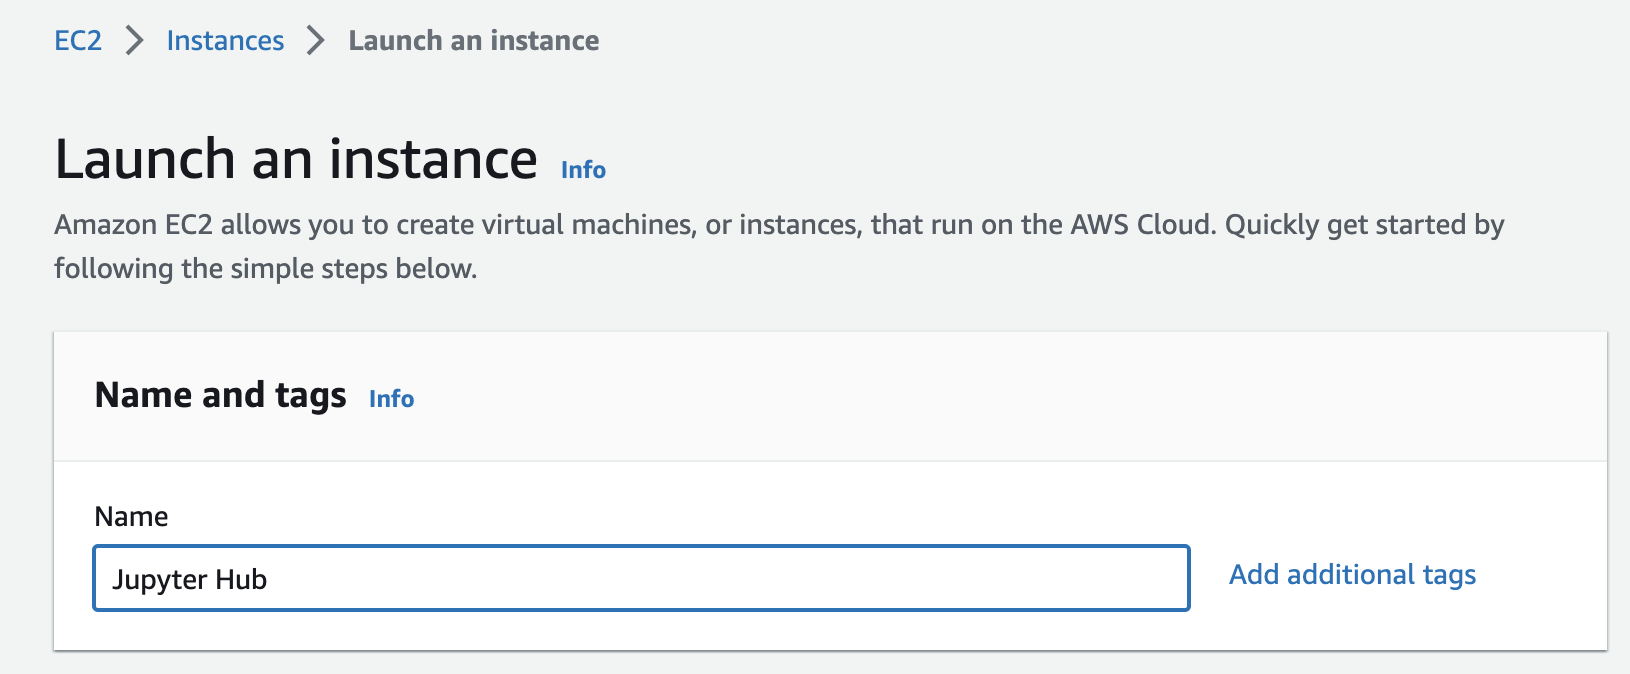

## Picking an operating system

For the purpose of this tutorial we will using Ubuntu Server:

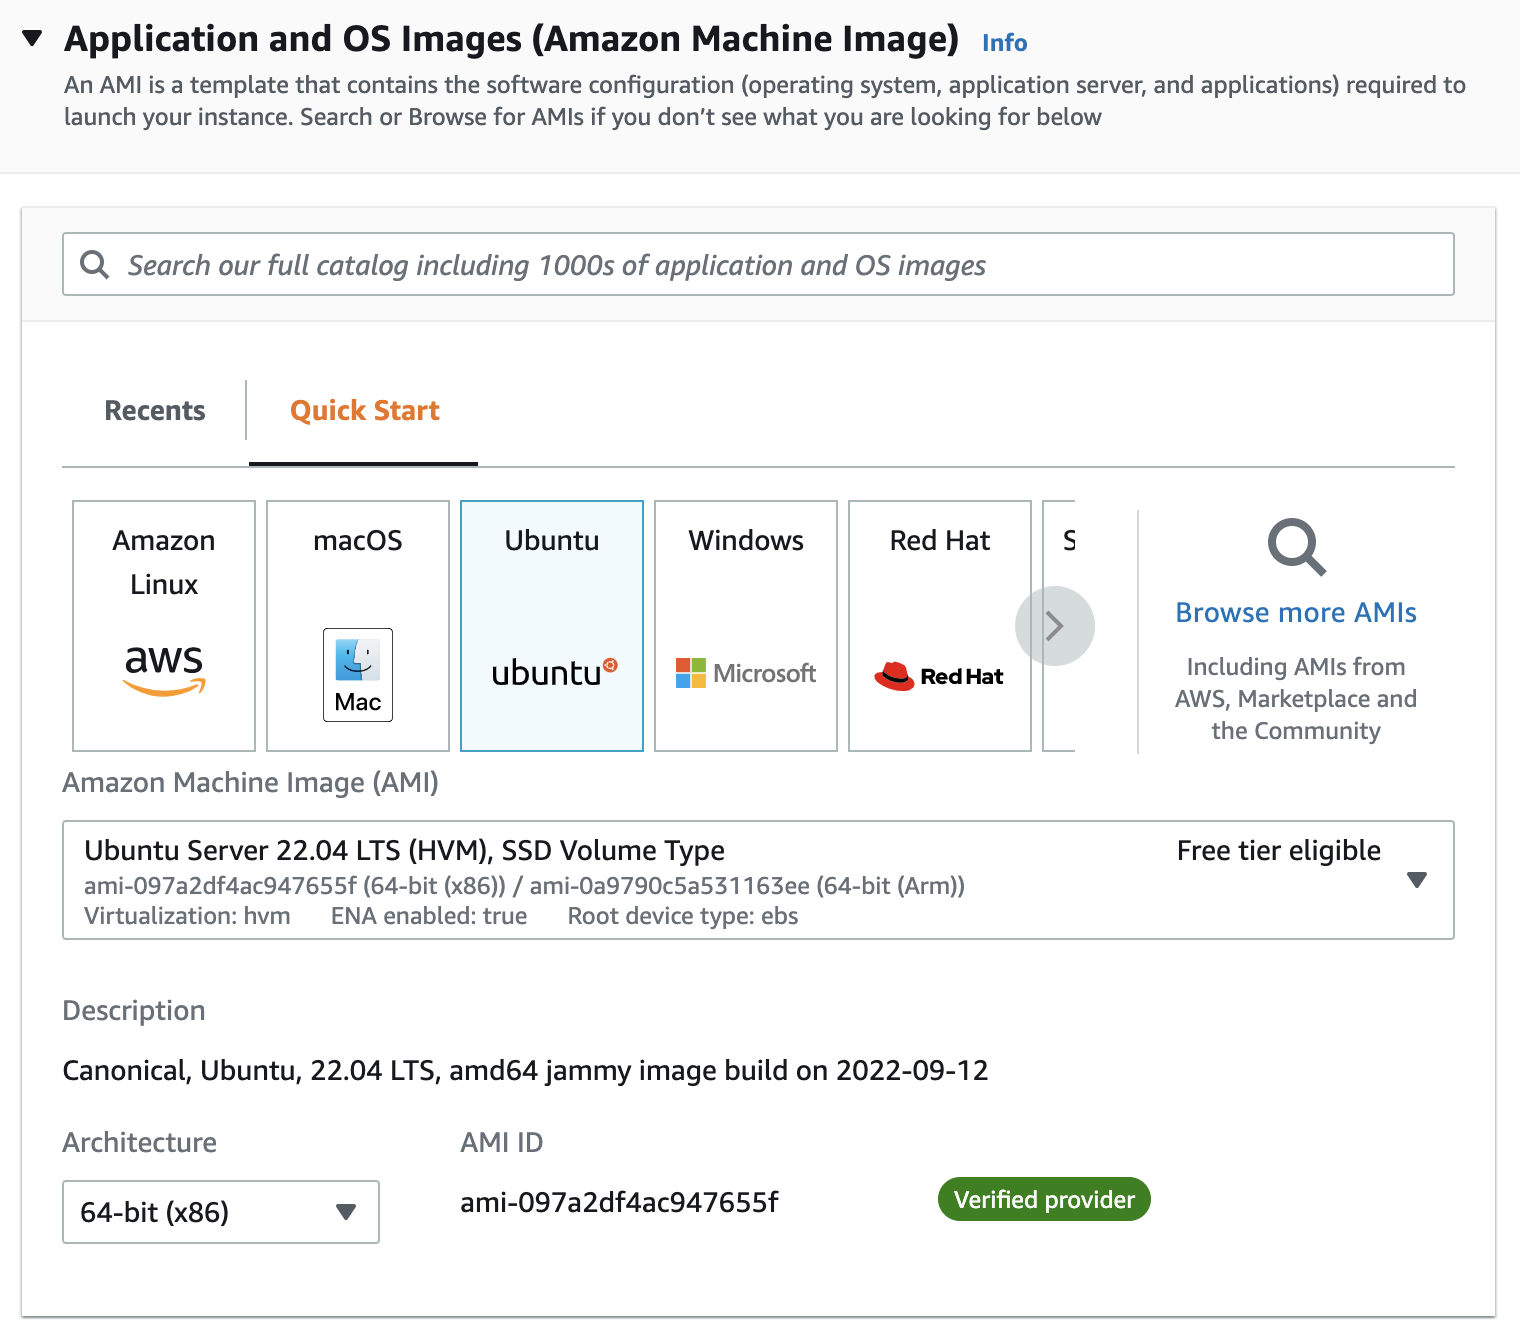


## Choose your power

The instance type of your server will determine how much hardware is dedicated to your server. The more vCPUs and Memory, the faster your server will process requests. For this example we will be using the free “t2.micro” tier, providing 750 hours (which are the number of hours in a month) of uptime per month for your first year using AWS:

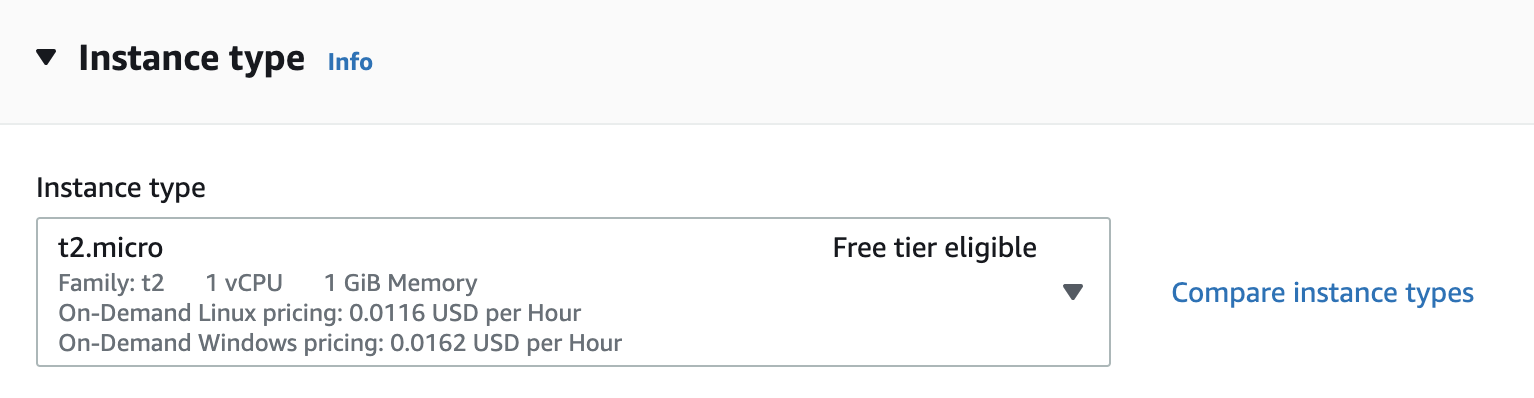

## Cost

- Running a small number of **low performance machines is pretty cheap**.  
- High performance machines can cost real money.  

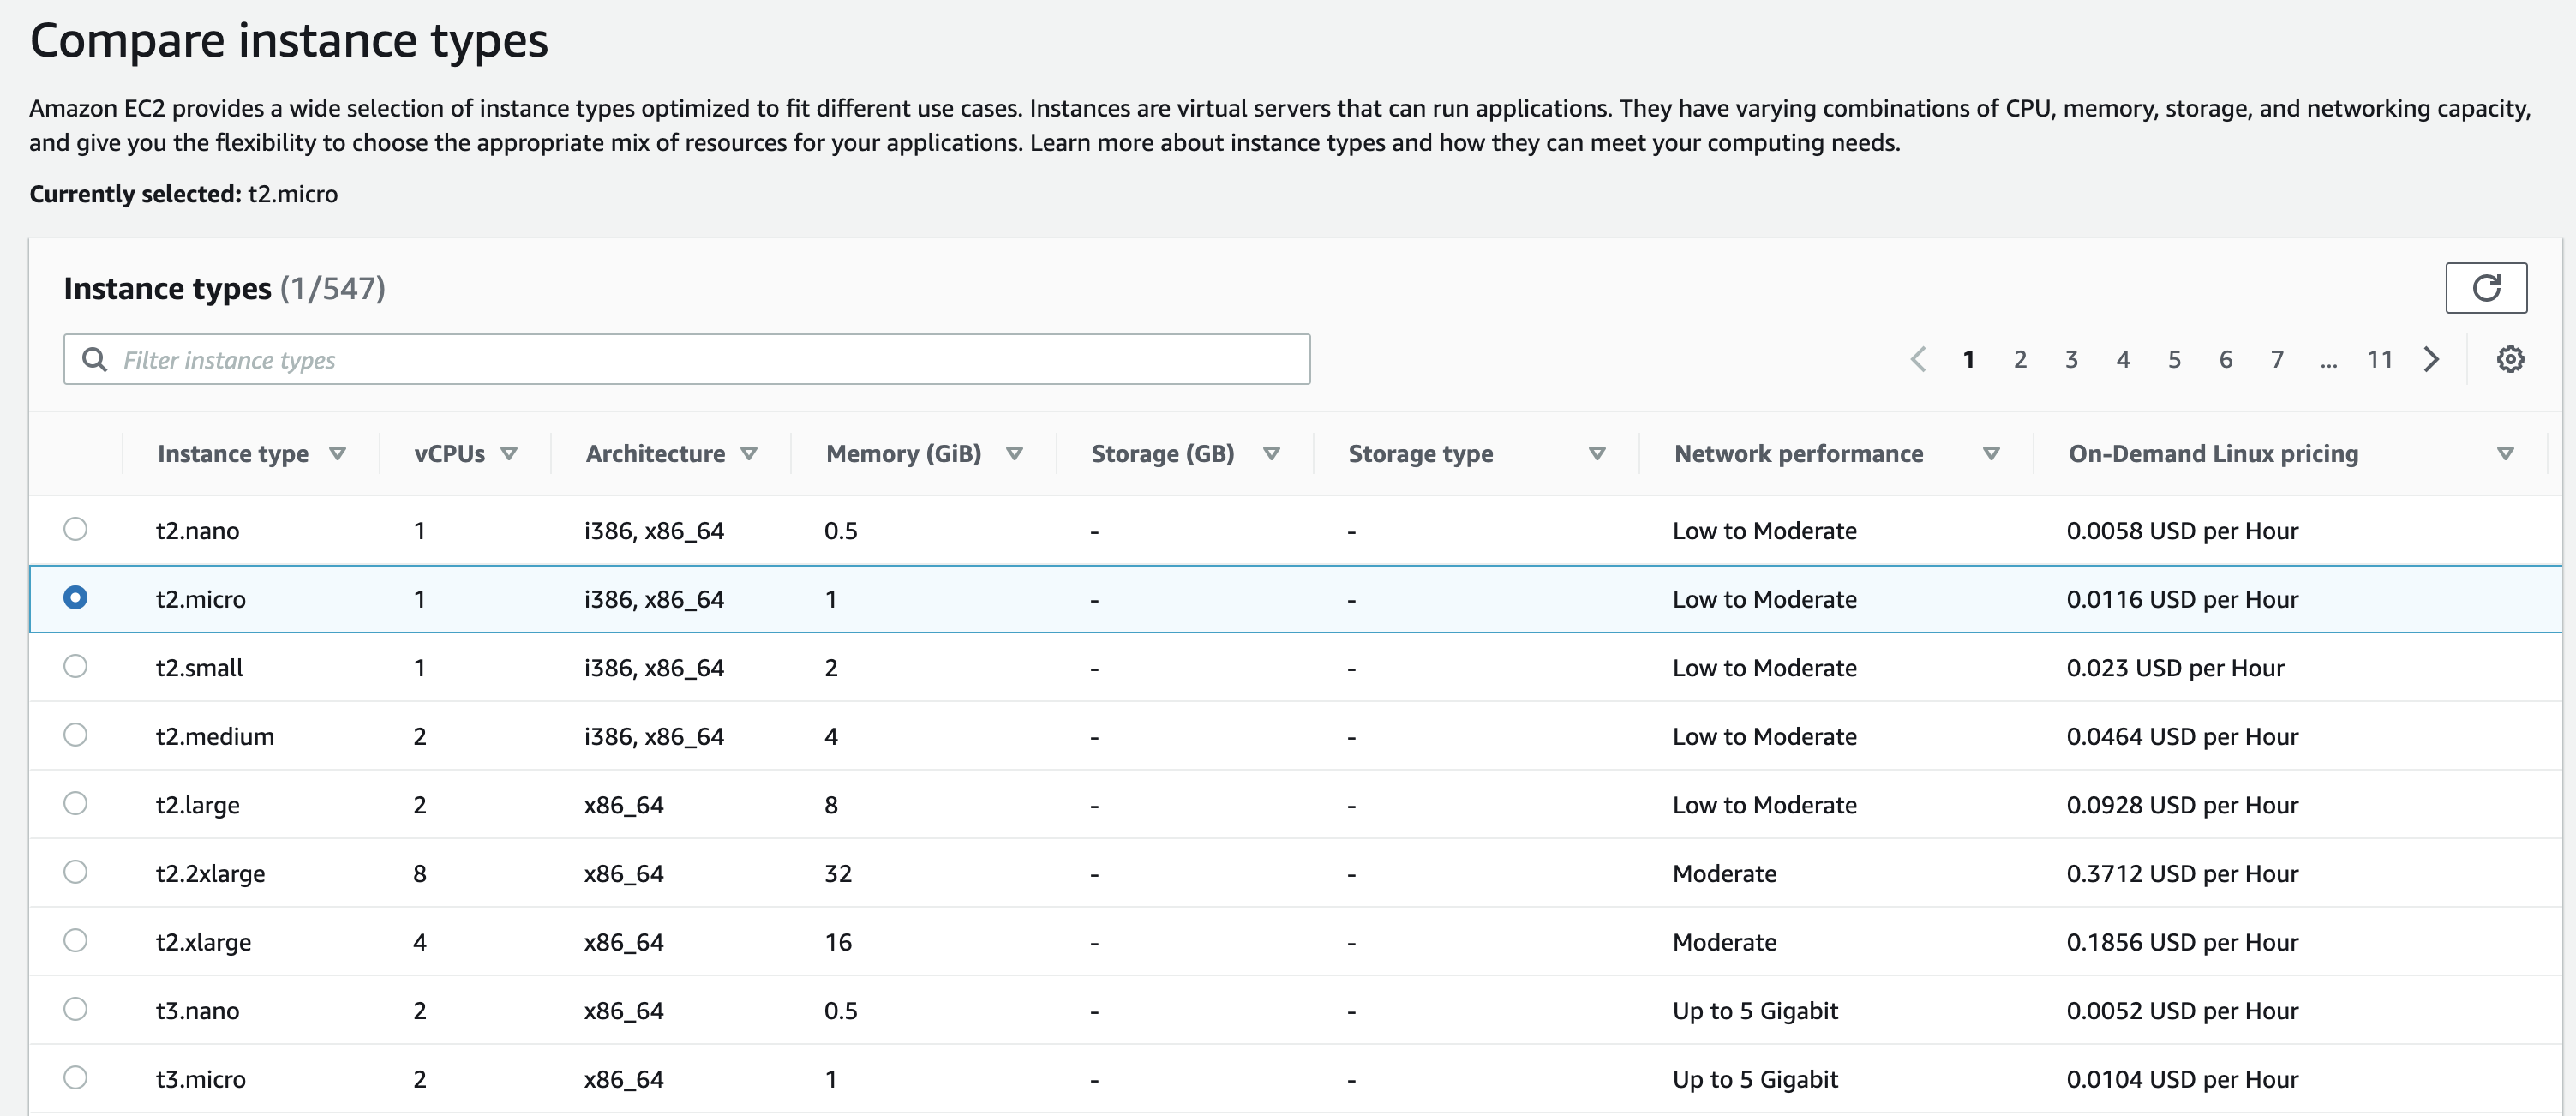

## Amazon Free Tier / Educate Account

Amazon Educate / [Amazon Free](https://aws.amazon.com/free/) provides about **750 hours of computing per month for free** on a subsets of services.  

![](images/aws_free.png)

## Spot instances

Make use of [Amazon’s Spot Instances](https://aws.amazon.com/ec2/spot-instances/), for large cost reductions on non critical computations.

![](images/rcloud_4.png)


## Spot Instances

[Choose what you need](https://us-east-2.console.aws.amazon.com/ec2sp/v1/spot/advisor?region=us-east-2) and see the pricing.

![](images/rcloud_5.png)


## Security Settings

Configure your security group to allow HTTPS traffic (from either all IPs or your own only for security).

For our tutorial, we will tunnel to our Jupyter Notebook Server via a SSH connection. 

Alternatively, to reach your  a Jupyter Notebook on the web, you are also going to need to add a custom rule for where the website is meant to run.

Use “Add Rule” to add new Security Group rules. You will need three new rules:

- The `SSH` rule will allow us to connect to the server via SSH.
- The `HTTPS` rule will allow us to connect the EC2 to a website.
- The `Custom TCP` rule determines which port to run the website on.

Setting the source to anywhere will allow you to access your Jupyter Notebook from any IP address. You can limit access by entering a custom IP into the source.

## Security Settings

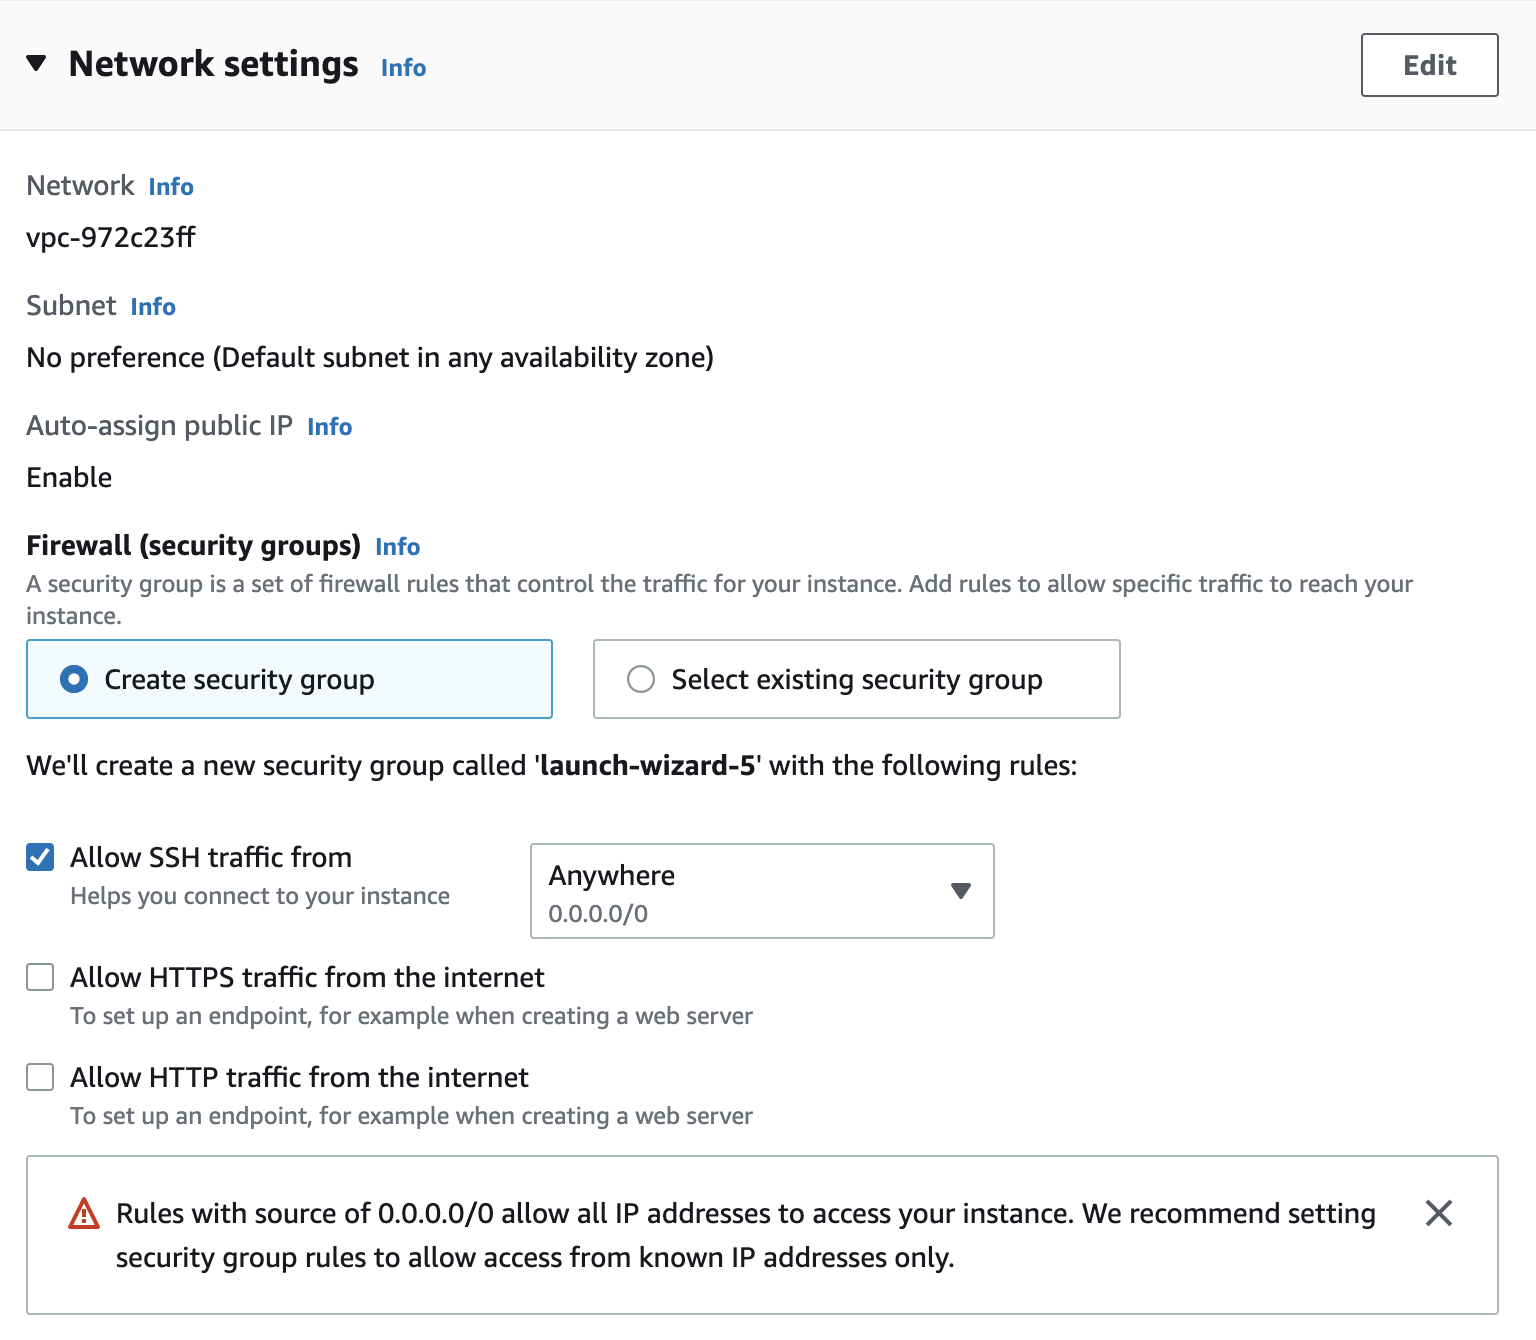

## Create a Key Pair (security measure)

When prompted to create an SSH key, you must “Create a new key pair” and download the pair to finish creating your EC2 instance:

![](images/rcloud_7.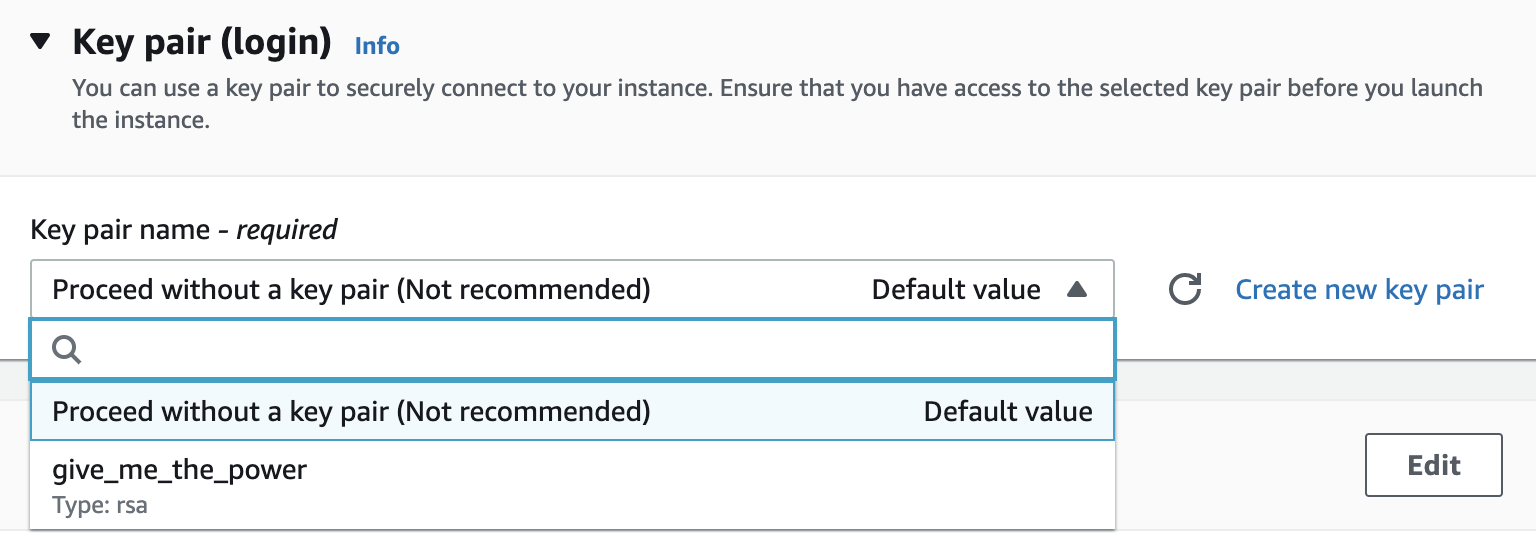png)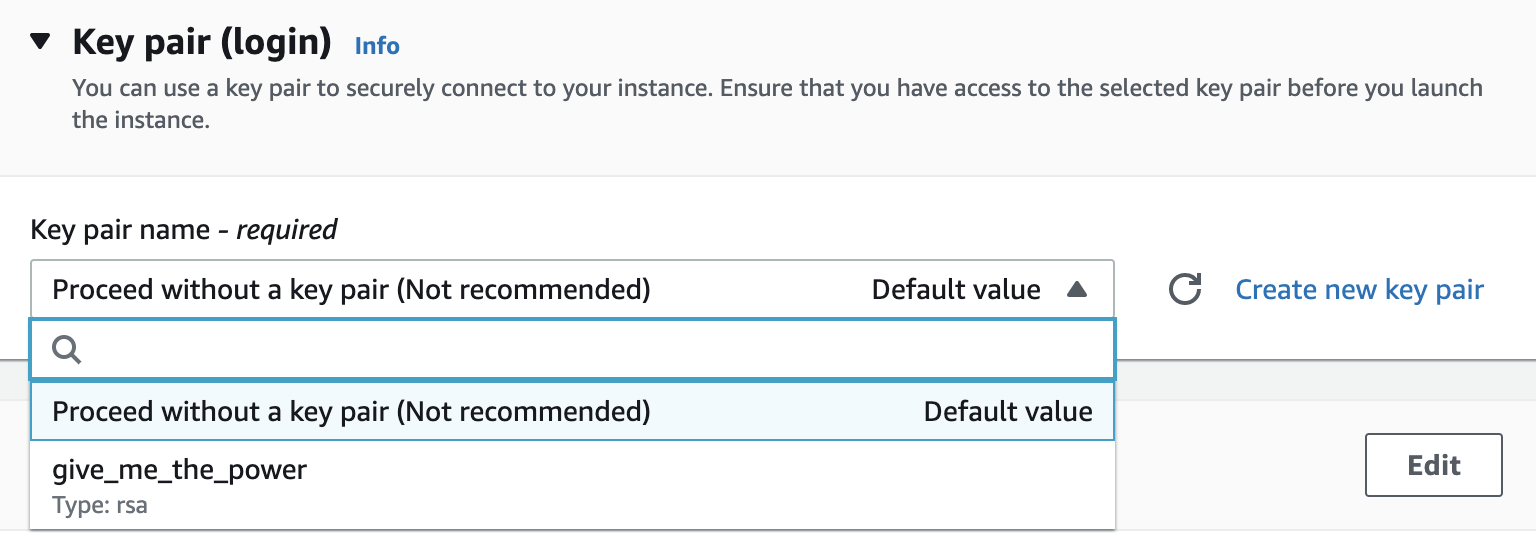

# Add Storage

Consider adding some storage to your instance which will be useful for temporarily storing data etc.

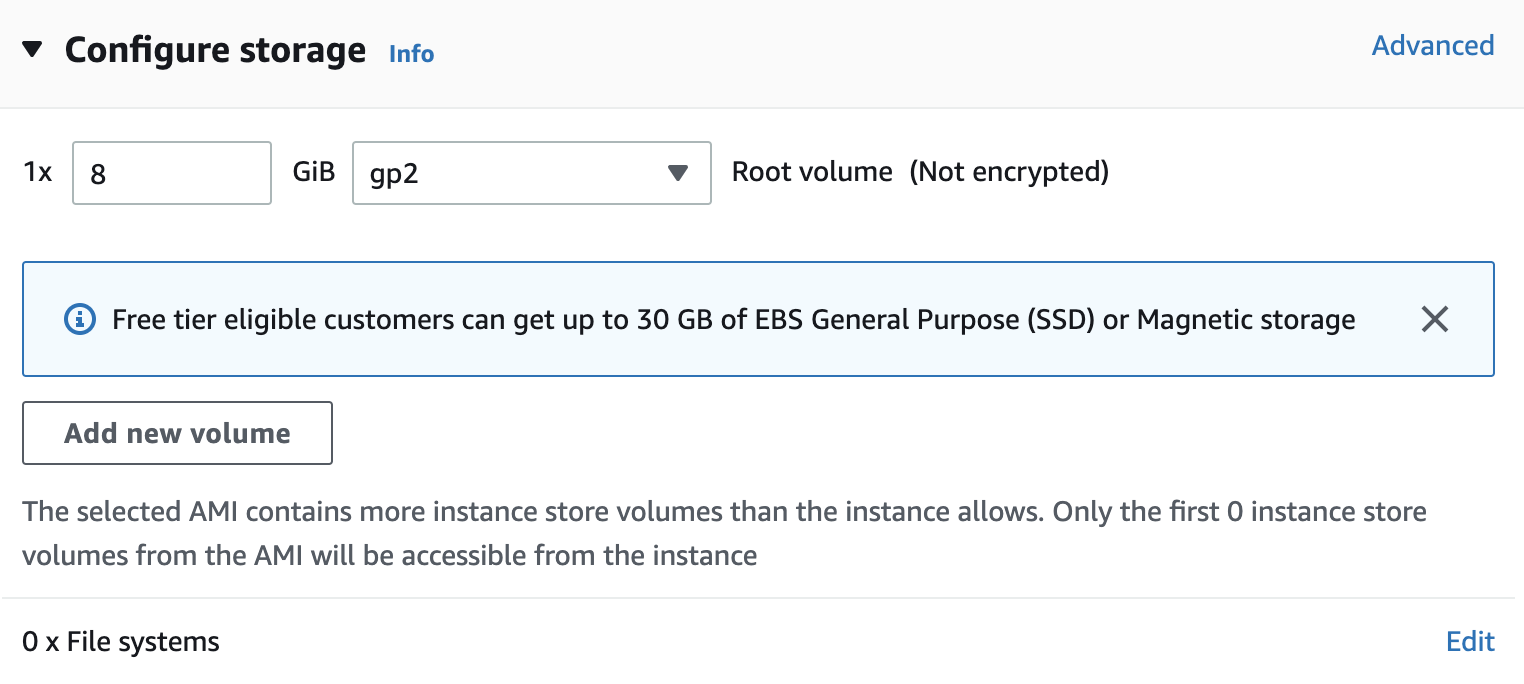

## Launch

![](images/rcloud_8.png)

# Connecting via SSH

Click on the `Connect` button associated with your instance:

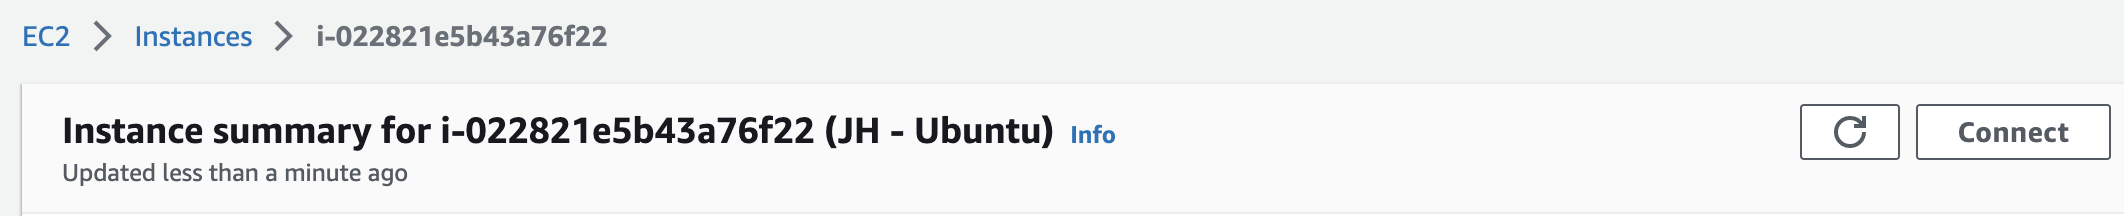

Follow the steps:

1. Open an SSH client - ideally your terminal.

2. Locate your private key file. I named my key `give_me_the_power.pem`

3. Run this command, if necessary, to ensure your key is not publicly viewable.  
   ```chmod 400 give_me_the_power.pem```

4. Connect to your instance using its Public DNS. You can do so via SSH, for example:  
   ```ssh -i "give_me_the_power.pem" ubuntu@ec2-3-128-32-72.us-east-2.compute.amazonaws.com```

You should be greeted with a message:

`Welcome to Ubuntu 22.04.1 LTS` or whatever Operating System you installed.

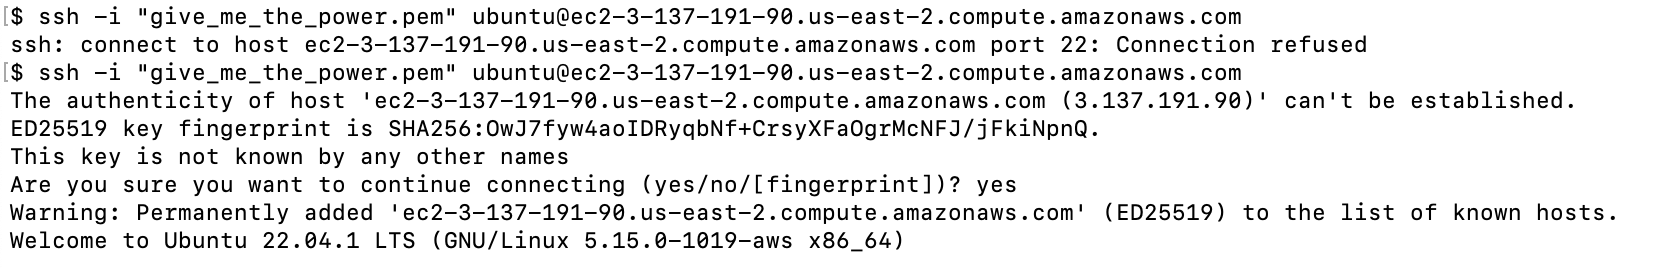

## Using the SSH key

This SSH key pair will allow you to connect remotely to your server from the command line. In order to do this you may have to change the permissions for your key file. This can be done in the terminal with:

`sudo chmod 400 /Path/Yourkey.pem`

_Note_: you will need to have an SSH client on your computer. All Macs come with SSH, Window users may have to install an SSH client. On you command line you can check if you have an SSH client by typing `SSH` and hitting enter and checking if your terminal recognizes the command.

You should be able to connect to your instance by copying the “Example” from the “Connect” tab. If you get an error about not being able to find the Permission File you may have to specify the path to the file. More information on [connecting VIA SSH can be found here on Amazon’s help site](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/AccessingInstances.html?icmpid=docs_ec2_console).



## Installing Jupyter Notebook

Once you are connected to your EC2, you can now to install Jupyter or anything that is needed on the machine. 

The easiest way to do this is with `Advanced package tool`, or `APT`. To do so, follow these commands:

1. Before anything, update your environment packages – a safe check:  
    `sudo apt update`  
    `sudo apt-get update`  
2. Install `jupyter notebook` using apt:  
    `sudo apt install jupyter-notebook`  
3. Start the notebook server:  
    `jupyter notebook --no-browser`
4. Go to URL shown on your browser, e.g.  
    `http://127.0.0.1:8888/?token=813cc8efbe7b0761f4f2f60c06f28aca6b7f788f4f285c1a` 

## Built-in Jupyter notebook in AWS Sagemaker

If you are interested in EC2 compute power for machine learning, the product `AWS Sagemaker` offers ready-made Jupyter Lab instances with easy access to compute. I recommend to use `AWS Sagemaker Studio` which now is also available for 2 months free with AWS Educate account.

![](images/sagemaker_notebook.png)


## AWS Sagemaker - instances and kernels

![](images/sagemaker_instances.png)

![](images/sagemaker_kernel.png)

## Other useful hands-on guides for AWS

* Create and Connect to a [MySQL Database](https://aws.amazon.com/getting-started/hands-on/create-mysql-db/) or a [Postgres Database](https://aws.amazon.com/getting-started/tutorials/create-connect-postgresql-db/?trk=gs_card)
* [Store and Retrieve a File](https://aws.amazon.com/getting-started/hands-on/backup-files-to-amazon-s3/)
* [Create a machine learning model automatically with Amazon SageMaker Autopilot](https://aws.amazon.com/getting-started/hands-on/create-machine-learning-model-automatically-sagemaker-autopilot/)

and [many more](https://aws.amazon.com/getting-started/hands-on/) ...




## Other Tutorials on code optimization

- [Stackify - 20 Simple Python performance tuning tips](https://stackify.com/20-simple-python-performance-tuning-tips/)
- [Codementor - Python Practices for Efficient Code: Performance, Memory, and Usability](https://www.codementor.io/@satwikkansal/python-practices-for-efficient-code-performance-memory-and-usability-aze6oiq65)
- [Real Python - Fast, Flexible, Easy and Intuitive: How to Speed Up Your Pandas Projects](https://realpython.com/fast-flexible-pandas/)

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
